In [18]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from randomuniverse import RandomUniverse
%matplotlib inline


In [19]:
# Read the file "Advertising_csv"
df = pd.read_csv('Advertising_adj.csv')

# Take a quick look at the data
df.head()


,tv,sales
0,230.1,465.26
1,44.5,218.95
2,17.2,195.79
3,151.5,389.47
4,180.8,271.58


In [20]:
np.random.randint(0,2,size=15)

array([1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1])

In [21]:
# Define a bootstrap function, which takes as input a dataframe 
# It must output a bootstrapped version of the input dataframe
def bootstrap(df):
    selectionIndex = np.random.randint(0, len(df), size = len(df))
    new_df = df.iloc[selectionIndex]
    return new_df


In [22]:
# Initialize two empty lists to store the beta values
beta0_list, beta1_list = [],[]

# Choose the number of "parallel" Universes to generate the new dataset
number_of_bootstraps = 500

# Loop through the number of bootstraps
for i in range(number_of_bootstraps):

    # Call the bootstrap function to get a bootstrapped version of the data
    df_new = bootstrap(df)

    # Find the mean of the predictor values i.e. tv
    xmean = df_new.tv.mean()

    # Find the mean of the response values i.e. sales
    ymean = df_new.sales.mean()

    #'X' is the predictor variable given by df_new.tv  
    X = df_new.tv
    
    #'y' is the reponse variable given by df_new.sales 
    y = df_new.sales
    
    # Compute the analytical values of beta0 and beta1 using the 
    # equation given in the hints
    beta1 = np.sum((X-xmean)*(y-ymean))/np.sum((X-xmean)**2)
    beta0 = ymean - beta1 * xmean

    # Append the calculated values of beta1 and beta0 to the appropriate lists
    beta0_list.append(beta0)
    beta1_list.append(beta1)


In [23]:
### edTest(test_beta) ###

# Compute the mean of the beta values
beta0_mean = np.mean(beta0_list)
beta1_mean = np.mean(beta1_list)


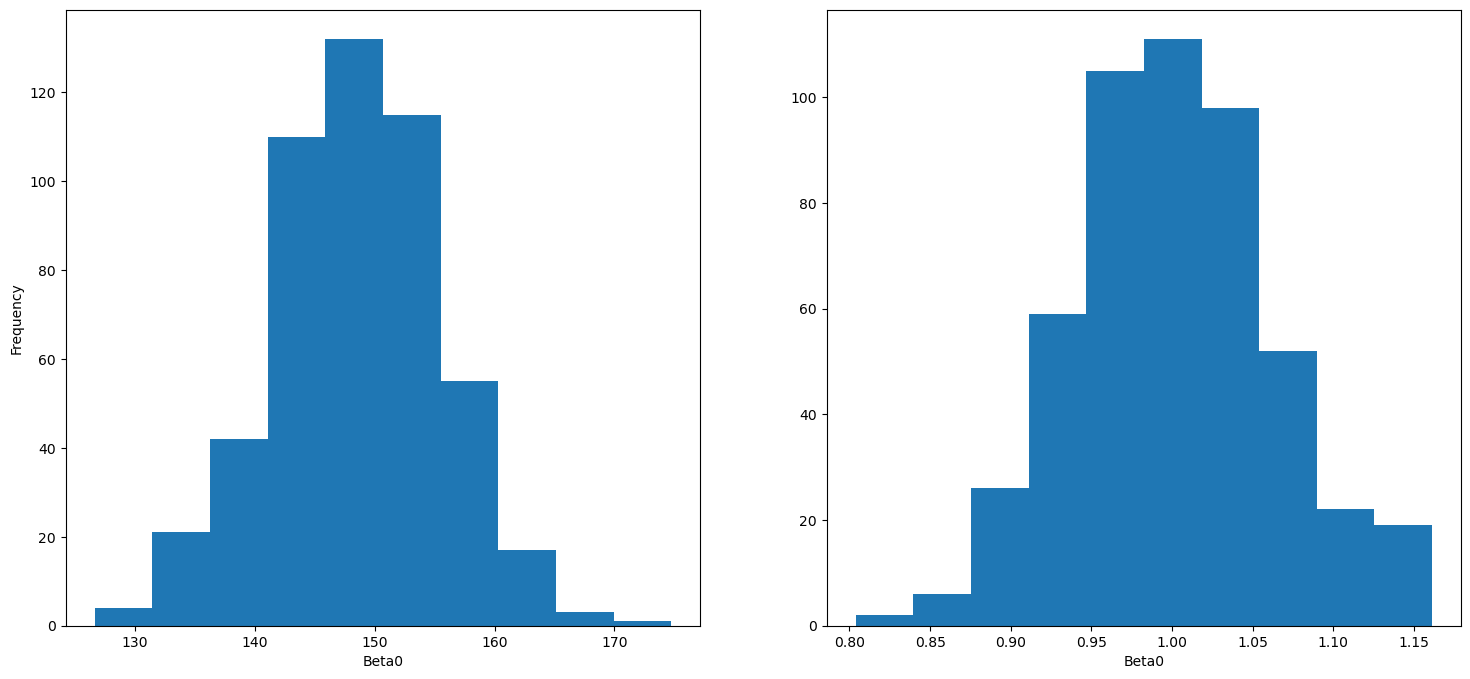

In [31]:
# Plot histograms of beta_0 and beta_1 using lists created above 

fig, ax = plt.subplots(1,2, figsize=(18,8))
ax[0].hist(beta0_list)
ax[1].hist(beta1_list)
ax[0].set_xlabel("Beta0")
ax[1].set_xlabel("Beta0")
ax[0].set_ylabel('Frequency')
plt.show();


### Compare the plots with the results from the RandomUniverse() function

In [25]:
# Helper code to visualise the similarity between the bootstrap
# function here & the RandomUniverse() function from last exercise
beta0_randUni, beta1_randUni = [],[]

parallelUniverses = 500

for i in range(parallelUniverses):
    df_new = RandomUniverse(df)
    
    xmean = df_new.tv.mean()
    ymean = df_new.sales.mean()

    # Using linear algebra result as discussed in lecture
    beta1 = (((df_new.tv - xmean)*(df_new.sales - ymean)).sum())/(((df_new.tv - xmean)**2).sum())
    beta0 = ymean - beta1*xmean

    beta0_randUni.append(beta0)
    beta1_randUni.append(beta1)


In [26]:
# Helper code to plot the bootstrapped beta values & the ones from random universe
def plotmulti(list1, list2):
    fig, axes = plt.subplots(1,2, figsize = (10,4), sharey = 'row')
    axes[0].hist(list1);
    axes[0].set_xlabel('Beta Distribution')
    axes[0].set_ylabel('Frequency')
    axes[0].set_title('Bootstrap')
    axes[1].hist(list2);
    axes[1].set_xlabel('Beta Distribution')
    axes[1].set_title('Random Universe')
    plt.show();


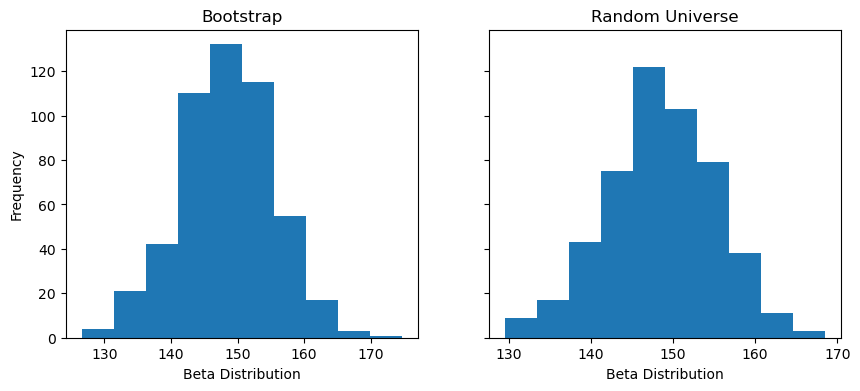

In [27]:
# Call the 'plotmulti' function above to compare the two histograms for beta0
plotmulti(beta0_list, beta0_randUni)


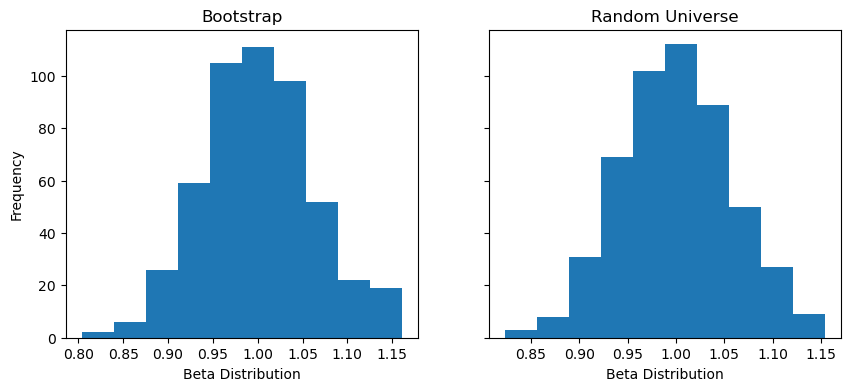

In [28]:
# Call the 'plotmulti' function above to compare the two histograms for beta1
plotmulti(beta1_list, beta1_randUni)
